# History matching in sugarscape

A very brief description of sugarscape:
The environment grows sugar. The amount of sugar any location in the environment is capable of growing is in the range [0, 4].
Agents wander around harvesting sugar. The eat only what they need, and carry around any extra sugar they harvested.
After a location has been harvested, it regenerates its sugar by 1 each step in the simulation.
If there's not enough sugar in the agent's current location they try to move to a new location that has more sugar. They're limited in how far they can see and, therefore, how far they can move.
If they can't find enough sugar they die.


In [1]:
import numpy as np

from sugarscape_cg.model import SugarscapeCg

import history_matching

## Exploring maximum metabolism

Create a function that takes the parameter(s) being tested and returns the output of interest.
In this example, we'll explore the effect of changing the agents maximum metabolism.
The higher an agent's metabolism, the more food they need to eat to survive.

The model will run for 50 steps as I found this was always sufficient to achieve a steady population state.

In [2]:
def run_simulation(x):
    SS = SugarscapeCg(max_metabolism=x)
    SS.verbose = False
    y =  SS.run_model(step_count=50)
    return y

We'll pretend one given run of the simulation is the "real world". In this case, the area was able to sustain a population of 66 agents.

Note, the initial population in the model is 100, and agents die if there is not enough food --- in fact, this is the only way they can die.

In [3]:
history_matching.y = 66  # the real world observation
history_matching.f = run_simulation  # the function (simulation) used for history matching

History matching involves multiple waves, each of which should (hopefully) narrow down the plausible space.
There are several different stopping criteria that can be chosen to define when the waves should stop.
Here, well use "history_matching.is_all_plausible", which checks if no new implausible spaces were found in the previous wave.

In [4]:
def run_history_matching(plaus_space):
    new_plaus_space = history_matching.wave(np.array(plaus_space), True)
    while not history_matching.is_all_plausible(plaus_space, new_plaus_space):
        plaus_space = new_plaus_space
        new_plaus_space = history_matching.wave(plaus_space, True)
    print('Finished with', str(new_plaus_space))

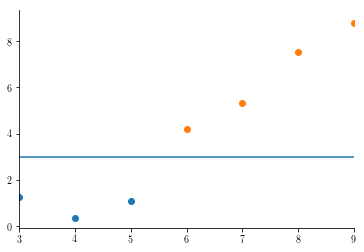

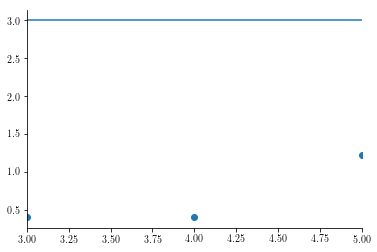

Finished with [3 4 5]


In [5]:
# initial plausible space to explore
# note that SugarscapeCg only takes integer values for metabolism
plaus_space = np.array(range(3, 10))
run_history_matching(plaus_space)

We first tested maximum metabolisms in the range [3, 9]. The first wave shows values in the range [3,5] are plausible, and the rest are implausible.

In the second wave, we still find values in the range [3,5] are plausible.

As the plausible space is unchanged after the second wave, the procedure ends.

The "correct" result (used for the "real world" run) is 4.

## Exploring maximum vision

Next, let's explore the maximum vision; that is, how far the agent can see and therefore move. The further they can see, the more spaces with food they can explore and, therefore, the less likely they are to die. We'll have the maximum metabolism set at 4.

In [6]:
def run_simulation(x):
    SS = SugarscapeCg(max_vision=x)
    SS.verbose = False
    y =  SS.run_model(step_count=50)
    return y

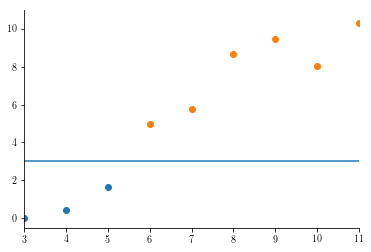

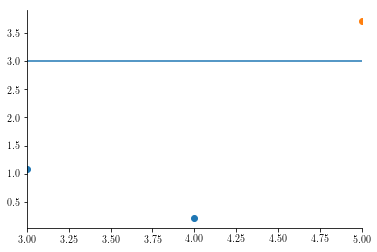

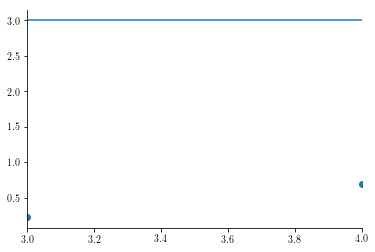

Finished with [3 4]


In [7]:
# initial plausible space to explore
# note that SugarscapeCg only takes integer values for vision
plaus_space = np.array(range(3, 12))
run_history_matching(plaus_space)

In this case, maximum vision in the range [3, 5] was found to be plausible in the first wave.

The range [3, 4] was found in the second wave.

The third wave also found [3, 4], so we end the procedure.

Interestingly, the maximum vision in the "real world" model was 6.

Note that this history matching example only considers uncertainty in the ensemble runs. As you add more uncertainty, the chance of a given parameter being plausible increases. Therefore, if we include other uncertainties, perhaps we may find 6 to be plausible.

## Notes

One thing of note, is that each time I run a procedure of waves, the results can differ. For example, sometimes the  max vision example stops with the plausible space [3, 4, 5], sometimes it stops with the space [3, 5], and on the above example it stopped with [3, 4]. I'm interested to know how people handle variability in the history matching results.

One thought (also mentioned above), is that the only uncertainty I'm quantifying, when considering if a given parameter is plausible, is variance across ensembles. However, it is common to include uncertainty in the model itself and in the observation (expected output) that you are comparing the simulation results against. If these uncertainties are modelled correctly, will there be less variability in the history matching results?